# Análisis de Componentes Principales

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

Indicadores PCA

In [ ]:
# Leer base de datos limpia despues de análisis de distancias
df = pd.read_csv("base_distancia_limpia.csv")
df_index = df[['Unnamed: 0']]
df.set_index("Unnamed: 0", inplace=True)

In [4]:
# Selección de variables para Análisis con PCA
df = df[[
"mes","moneda",
"gestoria",
"concepto",
"nivel_1_cuenta",
"vicepresidencia_direccion_cumpl",
"gasto_ejecutado"]]

df.head(10)

,mes,moneda,gestoria,concepto,nivel_1_cuenta,vicepresidencia_direccion_cumpl,gasto_ejecutado
Unnamed: 0,,,,,,,
0,1,COP,Logistica Integral,3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...,Utiles Y Papeleria,08b89b0d6020c28bcc5add99295361d6e41dd7d7b9123e...,100058.0
1,3,COP,Logistica Integral,3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...,Utiles Y Papeleria,08b89b0d6020c28bcc5add99295361d6e41dd7d7b9123e...,43392.0
2,2,COP,Logistica Integral,3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...,Utiles Y Papeleria,08b89b0d6020c28bcc5add99295361d6e41dd7d7b9123e...,41232.0
3,3,COP,Logistica Integral,3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...,Utiles Y Papeleria,08b89b0d6020c28bcc5add99295361d6e41dd7d7b9123e...,21696.0
4,3,COP,Logistica Integral,3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...,Utiles Y Papeleria,08b89b0d6020c28bcc5add99295361d6e41dd7d7b9123e...,68720.0
5,1,COP,Logistica Integral,3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...,Utiles Y Papeleria,08b89b0d6020c28bcc5add99295361d6e41dd7d7b9123e...,53695.0
7,3,COP,Logistica Integral,3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...,Utiles Y Papeleria,08b89b0d6020c28bcc5add99295361d6e41dd7d7b9123e...,126880.0
8,3,COP,Logistica Integral,3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...,Utiles Y Papeleria,08b89b0d6020c28bcc5add99295361d6e41dd7d7b9123e...,126880.0
9,3,COP,Logistica Integral,3406c715abccdf1f5073c25b565c68493c9e0ef3c43920...,Utiles Y Papeleria,08b89b0d6020c28bcc5add99295361d6e41dd7d7b9123e...,126880.0


In [5]:
df_index.head()

,Unnamed: 0
0,0
1,1
2,2
3,3
4,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566074 entries, 0 to 571917
Data columns (total 7 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   mes                              566074 non-null  int64  
 1   moneda                           566074 non-null  object 
 2   gestoria                         566071 non-null  object 
 3   concepto                         566074 non-null  object 
 4   nivel_1_cuenta                   566074 non-null  object 
 5   vicepresidencia_direccion_cumpl  566074 non-null  object 
 6   gasto_ejecutado                  566074 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 34.6+ MB


In [7]:
# Para las columnas 'concepto' y 'Vicepresidencia_direccion_cumpl' se cambia información encriptada por información más fácil de intepretar
for i, item in enumerate(list(df.concepto.unique())):
    df['concepto'] = df['concepto'].str.replace(item, f'Conc {i}')  

for i, item in enumerate(list(df.vicepresidencia_direccion_cumpl.unique())):
    df['vicepresidencia_direccion_cumpl'] = df['vicepresidencia_direccion_cumpl'].str.replace(item, f'Vice {i}')  

df.head(10)

,mes,moneda,gestoria,concepto,nivel_1_cuenta,vicepresidencia_direccion_cumpl,gasto_ejecutado
Unnamed: 0,,,,,,,
0,1,COP,Logistica Integral,Conc 0,Utiles Y Papeleria,Vice 0,100058.0
1,3,COP,Logistica Integral,Conc 0,Utiles Y Papeleria,Vice 0,43392.0
2,2,COP,Logistica Integral,Conc 0,Utiles Y Papeleria,Vice 0,41232.0
3,3,COP,Logistica Integral,Conc 0,Utiles Y Papeleria,Vice 0,21696.0
4,3,COP,Logistica Integral,Conc 0,Utiles Y Papeleria,Vice 0,68720.0
5,1,COP,Logistica Integral,Conc 0,Utiles Y Papeleria,Vice 0,53695.0
7,3,COP,Logistica Integral,Conc 0,Utiles Y Papeleria,Vice 0,126880.0
8,3,COP,Logistica Integral,Conc 0,Utiles Y Papeleria,Vice 0,126880.0
9,3,COP,Logistica Integral,Conc 0,Utiles Y Papeleria,Vice 0,126880.0


In [8]:
# Validando la cantidad de Registros por nivel_1_cuenta
cant_registros_cuenta = df.groupby("nivel_1_cuenta").size().reset_index(name='conteo')
cant_registros_cuenta = cant_registros_cuenta.sort_values(by='conteo', ascending=False).reset_index(drop=True)
cant_registros_cuenta.head(10)

,nivel_1_cuenta,conteo
0,Impuestos Y Contribuciones,146961
1,Sin descripcion,76702
2,Diversos Otros,62218
3,Servicios De Aseo Y Vigilancia,37408
4,Mantenimiento Y Reparaciones,35509
5,Aportes A La Seguridad Social,31749
6,Utiles Y Papeleria,29619
7,Otros,28246
8,Transporte,17550
9,Vacaciones Legales Y Extralegales,13007


51


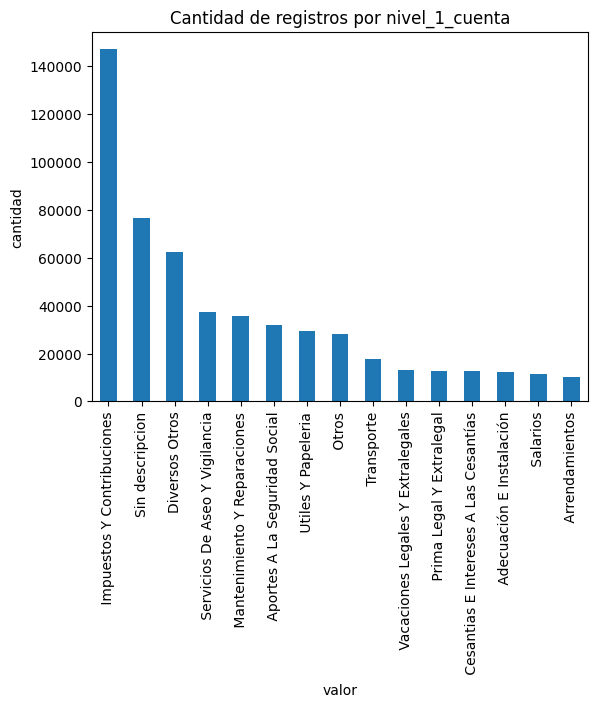

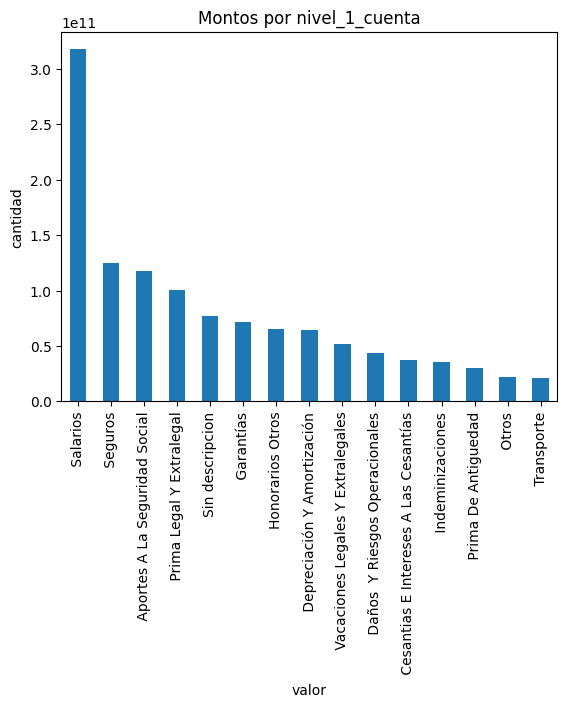

In [9]:
# Cantidad de Registros y Gasto Ejecutado por cuenta
print(len(df.nivel_1_cuenta.unique()))

cantidad_nivel_1_cuenta = df.nivel_1_cuenta.value_counts()
monto_por_nivel_1_cuenta = df.groupby("nivel_1_cuenta")["gasto_ejecutado"].sum().sort_values(ascending=False)

# Frecuencia
top_cant_nivel_1_cuenta = cantidad_nivel_1_cuenta.nlargest(15)
top_cant_nivel_1_cuenta.plot(kind='bar')
plt.xlabel("valor")
plt.ylabel("cantidad")
plt.title("Cantidad de registros por nivel_1_cuenta")
plt.show()

# Por monto del gasto ejecutado
top_monto_nivel_1_cuenta = monto_por_nivel_1_cuenta.nlargest(15)
top_monto_nivel_1_cuenta.plot(kind='bar', )
plt.xlabel("valor")
plt.ylabel("cantidad")
plt.title("Montos por nivel_1_cuenta")
plt.show()


In [10]:
# Se crea un dataframe solo con las X para analisis de PCA
bd = df.drop(columns=['gasto_ejecutado'])

#Transformación del dataset en variables Dummy
bd_dumies = pd.get_dummies(bd, columns=[
    'mes', 'moneda', 'gestoria', 'concepto', 
    'nivel_1_cuenta', 'vicepresidencia_direccion_cumpl'
    ])

column_names = bd_dumies.columns

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(bd_dumies)

# Aplicar PCA
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(componentes_principales, columns=['PC1', 'PC2'])
# Visualizar la varianza explicada por los componentes principales
varianza_explicada = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente principal: {varianza_explicada}")

Varianza explicada por cada componente principal: [0.01753608 0.01515344]


In [11]:
# Obtener los pesos de cada una de las variables Dummy en componente PC1 y PC2
V = pd.DataFrame(pca.components_, columns=column_names).T # vectores principales
V = V.rename(columns={0: 'PC1', 1: 'PC2'})
#V.to_excel('Vectores_principales_all.xlsx')
V

,PC1,PC2
mes_1,0.078544,0.011361
mes_2,0.042427,-0.027728
mes_3,-0.127741,0.017806
moneda_COP,0.044682,0.076545
moneda_EUR,-0.009710,-0.014341
...,...,...
vicepresidencia_direccion_cumpl_Vice 8,-0.003396,-0.000597
vicepresidencia_direccion_cumpl_Vice 80,-0.000278,-0.000283
vicepresidencia_direccion_cumpl_Vice 81,-0.001099,-0.001034
vicepresidencia_direccion_cumpl_Vice 82,-0.000552,-0.000823


Interpretación de las componentes principales

Aunque la Varianza explicada por cada una de las componentes es muy baja (Apenas supera un 2.5% de explicabilidad), podemos inferir según los pesos de cada componente que, la PC1 se ve explicada más por valores de las variables de concepto y vicepresidencia y la PC2 explica más nuestra variable objetivo con el nivel_1_cuenta y la gestoría

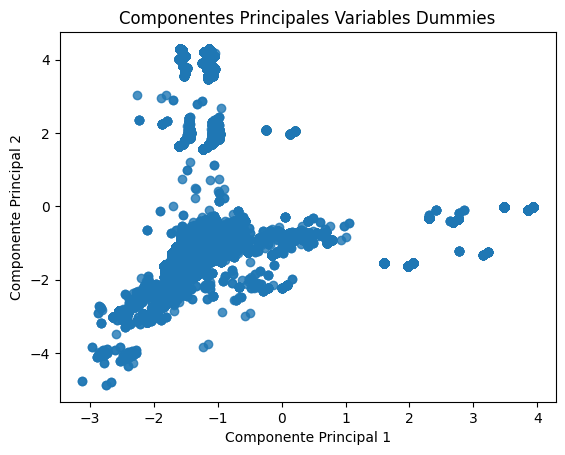

In [12]:
# Visualizar los datos después de PCA
plt.figure('PCA Plot')
plt.scatter(componentes_principales[:, 0], componentes_principales[:, 1], alpha=0.8)
plt.title('Componentes Principales Variables Dummies')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

In [13]:
# Evaluar el error del modelo para PC1

df_pca_result = pd.DataFrame(data=componentes_principales, columns=['PC1','PC2'])

scaler = MinMaxScaler()

# Aplicar el scaler a la columna 'gasto_ejecutado' y transformar los datos
df_pca_result['gasto_ejecutado_scaled'] = scaler.fit_transform(df[['gasto_ejecutado']])

# Definir PC1 como predictor y 'gasto_ejecutado' como la variable objetivo
X = df_pca_result[['PC1']]
y = df_pca_result['gasto_ejecutado_scaled']

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

df_pca_result['nivel_1_cuenta'] =  df['nivel_1_cuenta']

# Hacer predicciones
df_pca_result['y_gorro'] = model.predict(X)

#Indicador PC1 + y
df_pca_result['z_1'] = df_pca_result['PC1'] + df_pca_result['gasto_ejecutado_scaled']

df_pca_result['index'] = df_index[['Unnamed: 0']]
df_pca_result['gasto_ejecutado'] = df[['gasto_ejecutado']]
df_pca_result.set_index("index", inplace=True)
df_pca_result = df_pca_result[['PC1', 'PC2','gasto_ejecutado', 'gasto_ejecutado_scaled', 'y_gorro', 'z_1', 'nivel_1_cuenta']]
print(df_pca_result.head(10))

# Opcional: Evaluar el modelo (esto es solo para ver métricas de ajuste)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, df_pca_result['y_gorro'])
r2 = r2_score(y, df_pca_result['y_gorro'])
var = df_pca_result['gasto_ejecutado_scaled'].var()

print(len(df_pca_result))
print(f"Mean Squared Error: {mse}")
print(f"Variance: {mse}")
print(f"R^2: {r2}")



            PC1       PC2  gasto_ejecutado  gasto_ejecutado_scaled   y_gorro  \
index                                                                          
0     -1.261317 -1.300122         100058.0                0.140706  0.140767   
1     -1.709937 -1.284718          43392.0                0.140705  0.140771   
2     -1.339604 -1.381397          41232.0                0.140705  0.140768   
3     -1.709937 -1.284718          21696.0                0.140705  0.140771   
4     -1.709937 -1.284718          68720.0                0.140706  0.140771   
5     -1.261317 -1.300122          53695.0                0.140705  0.140767   
7     -1.709937 -1.284718              NaN                0.140707  0.140771   
8     -1.709937 -1.284718         126880.0                0.140707  0.140771   
9     -1.709937 -1.284718         126880.0                0.140707  0.140771   
10    -1.339604 -1.381397         126880.0                0.140707  0.140768   

            z_1       nivel_1_cuenta  


In [17]:
# información vacia en nivel_1_cuenta se cambia por la caracteristica 'Sin descripción'
df_pca_result['nivel_1_cuenta'].fillna('Sin descripcion',inplace=True)

C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\3292266074.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pca_result['nivel_1_cuenta'].fillna('Sin descripcion',inplace=True)


 Utiles Y Papeleria
Cuenta:  Utiles Y Papeleria, Número de outliers: 122


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


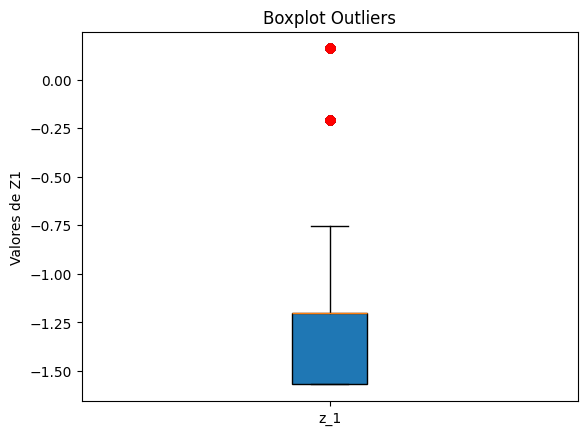

Sin descripcion


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


Cuenta: Sin descripcion, Número de outliers: 0


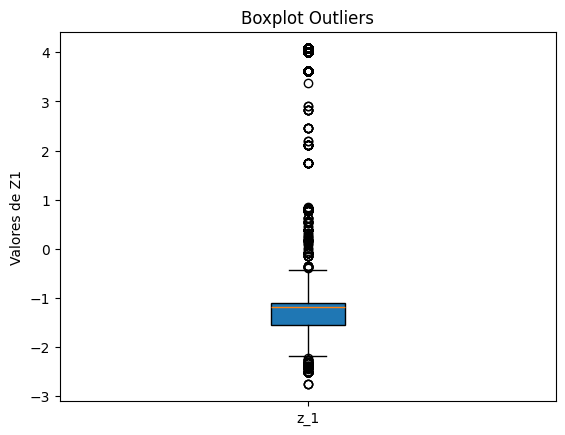

 Transporte
Cuenta:  Transporte, Número de outliers: 21


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


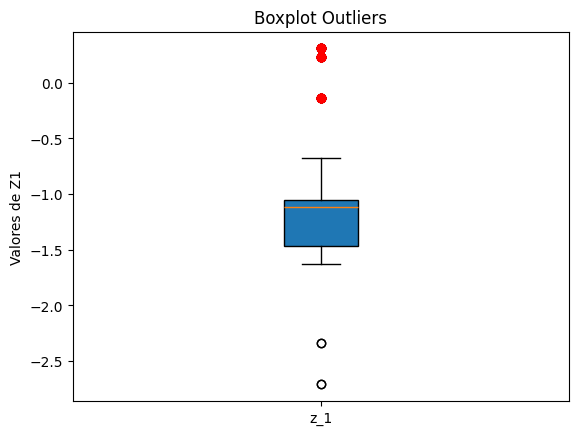

C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


 Aportes A La Seguridad Social
Cuenta:  Aportes A La Seguridad Social, Número de outliers: 0


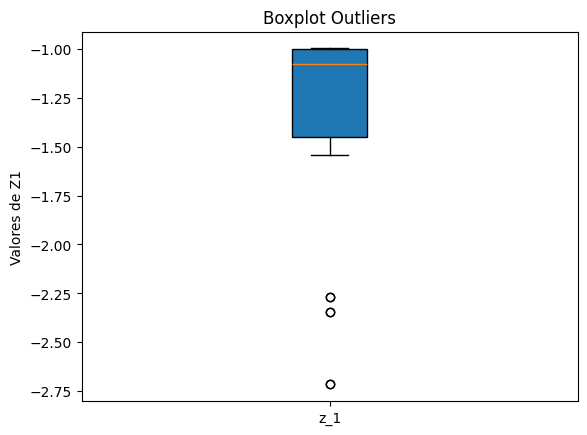

 Impuestos Y Contribuciones
Cuenta:  Impuestos Y Contribuciones, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


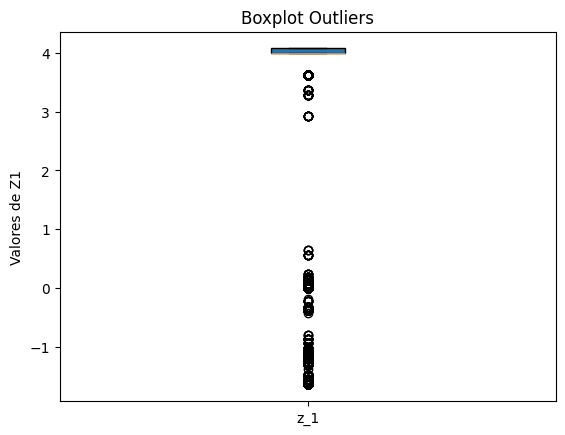

 Adecuación E Instalación
Cuenta:  Adecuación E Instalación, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


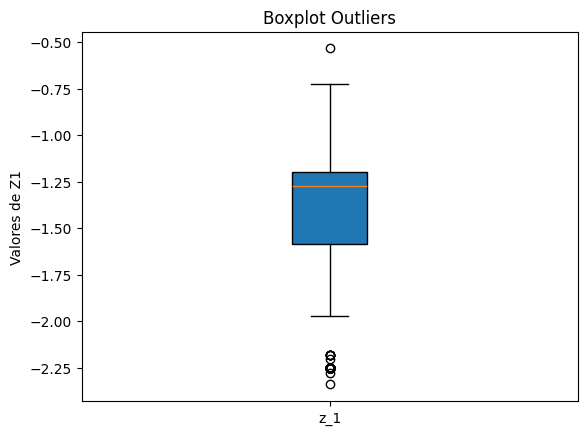

 Mantenimiento Y Reparaciones
Cuenta:  Mantenimiento Y Reparaciones, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


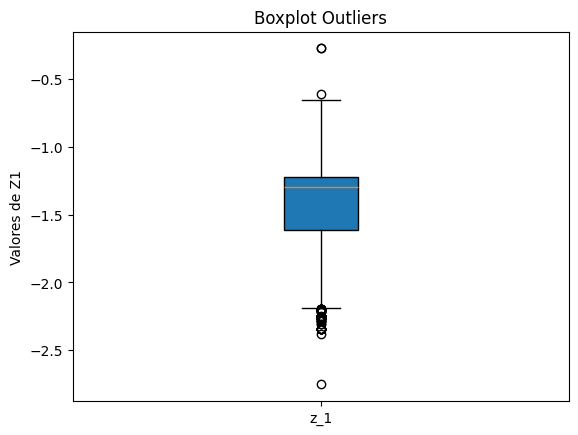

 Arrendamientos
Cuenta:  Arrendamientos, Número de outliers: 37


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


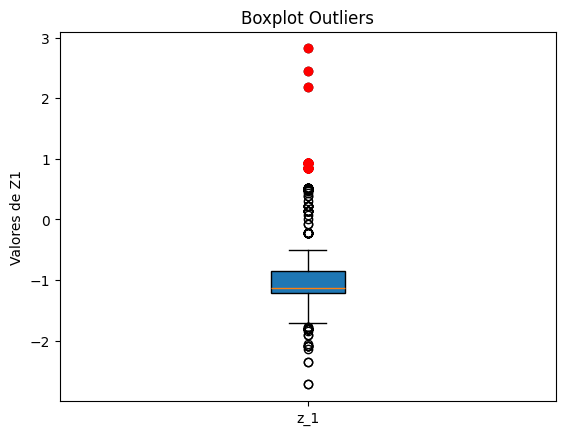

Diversos Otros
Cuenta: Diversos Otros, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


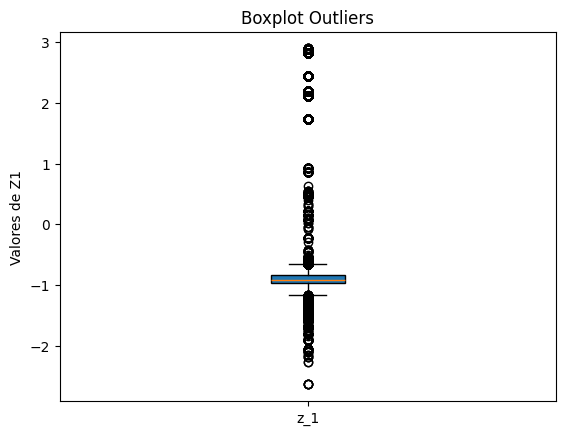

 Servicios De Aseo Y Vigilancia
Cuenta:  Servicios De Aseo Y Vigilancia, Número de outliers: 4


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


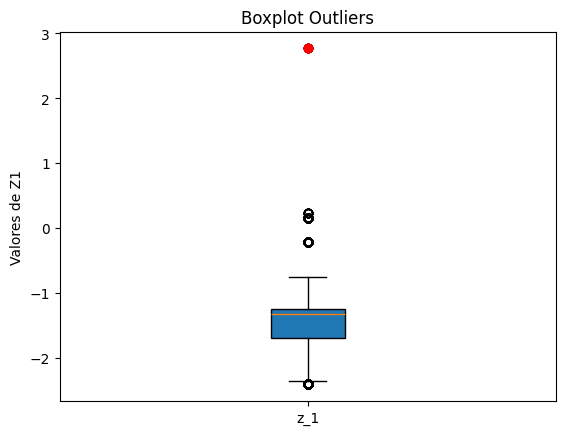

 Otros
Cuenta:  Otros, Número de outliers: 132


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


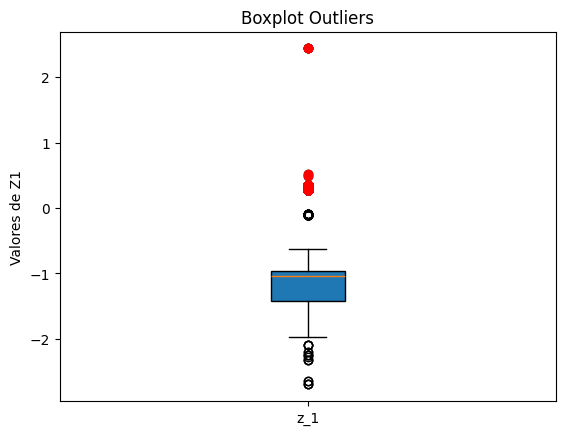

 Multas Y Sanciones
Cuenta:  Multas Y Sanciones, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


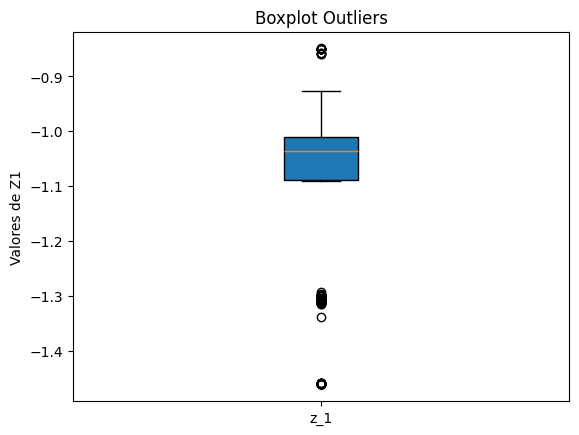

 Salarios
Cuenta:  Salarios, Número de outliers: 26


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


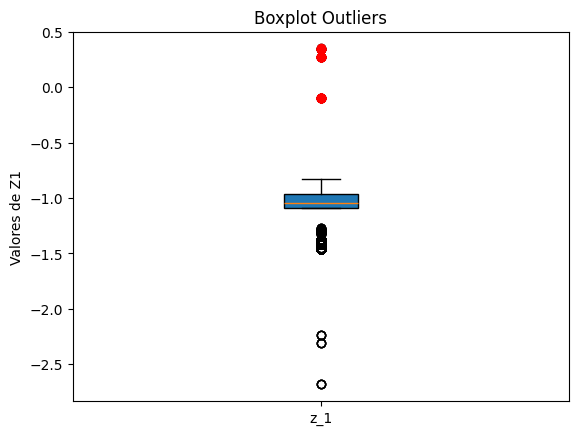

C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


 Vacaciones Legales Y Extralegales
Cuenta:  Vacaciones Legales Y Extralegales, Número de outliers: 0


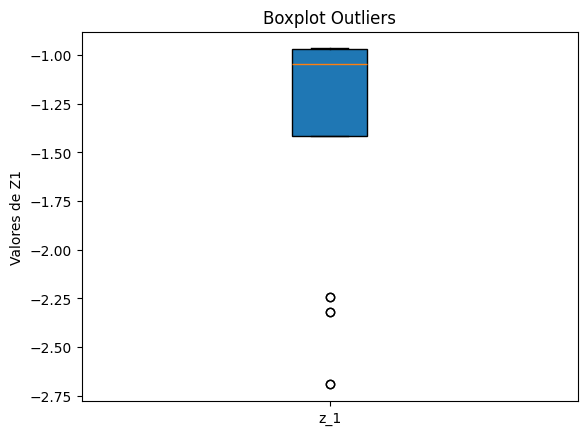

 Prima Legal Y Extralegal
Cuenta:  Prima Legal Y Extralegal, Número de outliers: 21


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


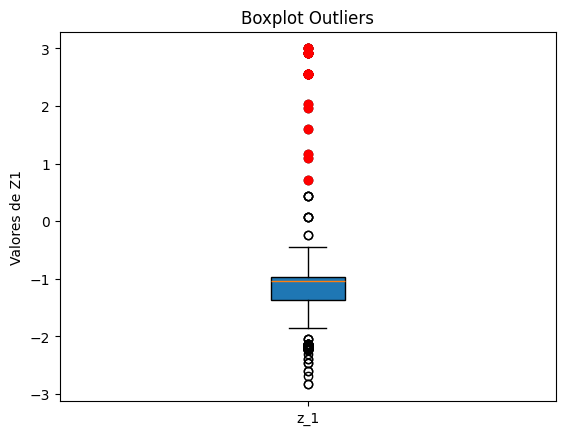

 Bonificaciones
Cuenta:  Bonificaciones, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


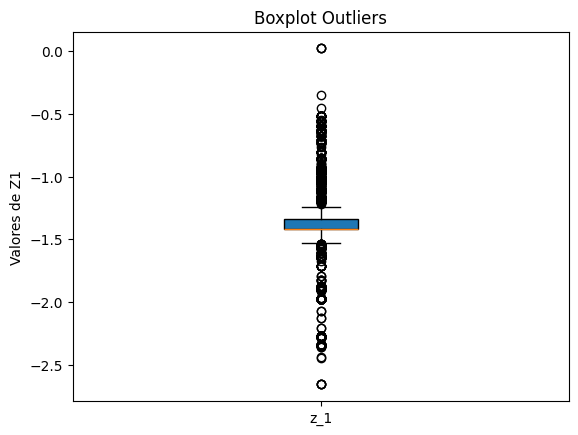

 Pensiones De Jubilación
Cuenta:  Pensiones De Jubilación, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


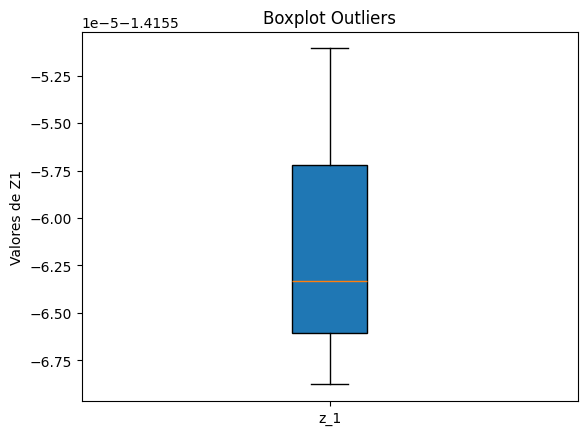

 Prima De Antiguedad
Cuenta:  Prima De Antiguedad, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


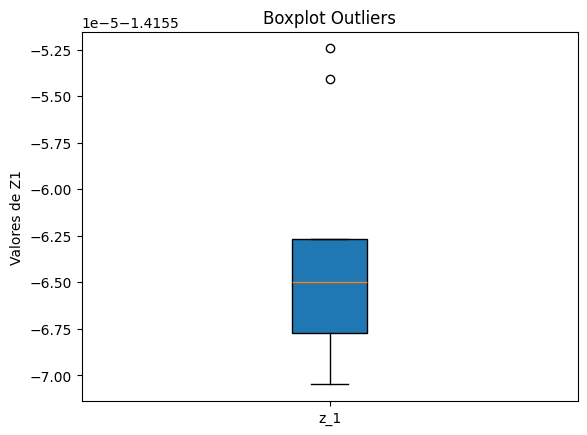

 Riesgo Operativo
Cuenta:  Riesgo Operativo, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


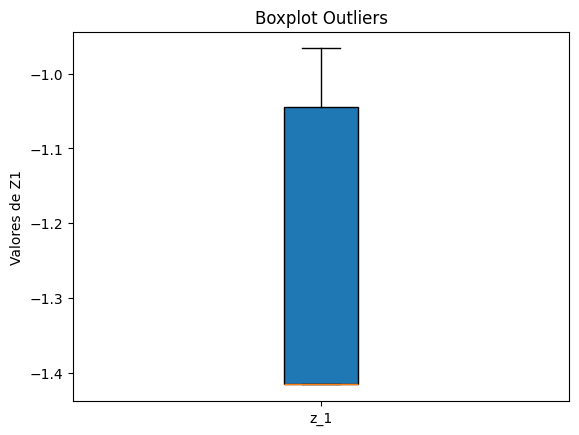

Licencias De Software
Cuenta: Licencias De Software, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


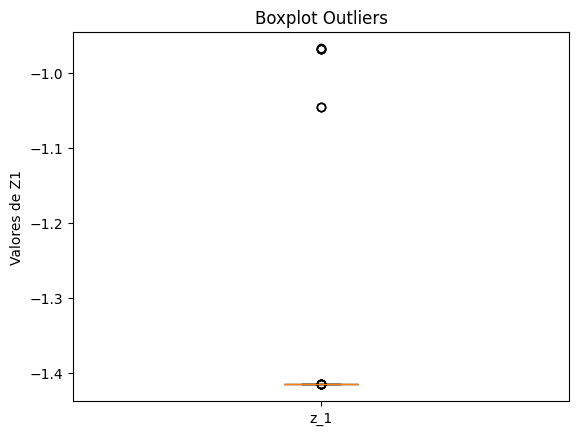

 Gastos Legales
Cuenta:  Gastos Legales, Número de outliers: 1


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


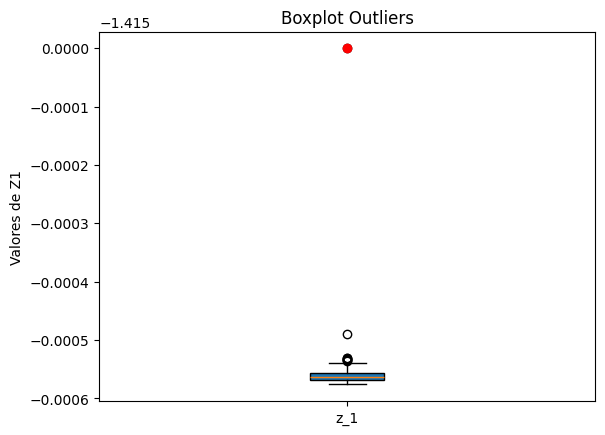

 Seguros
Cuenta:  Seguros, Número de outliers: 1


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


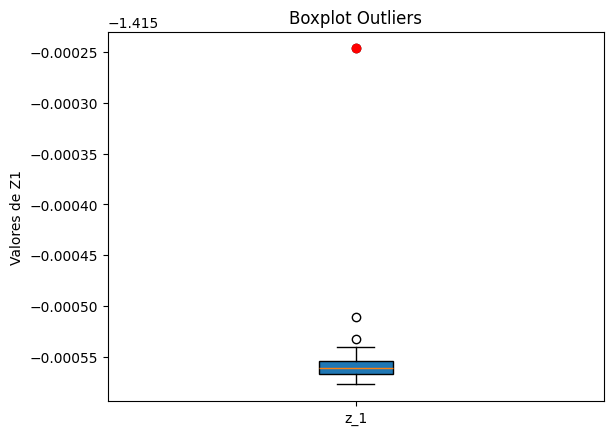

Gastos Legales
Cuenta: Gastos Legales, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


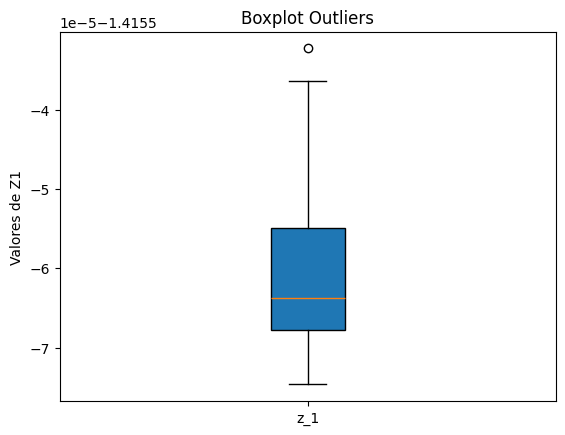

Riesgo Operativo
Cuenta: Riesgo Operativo, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


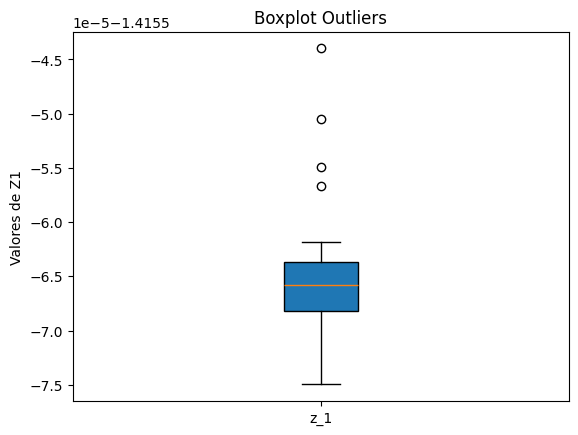

 Depreciación Y Amortización
Cuenta:  Depreciación Y Amortización, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


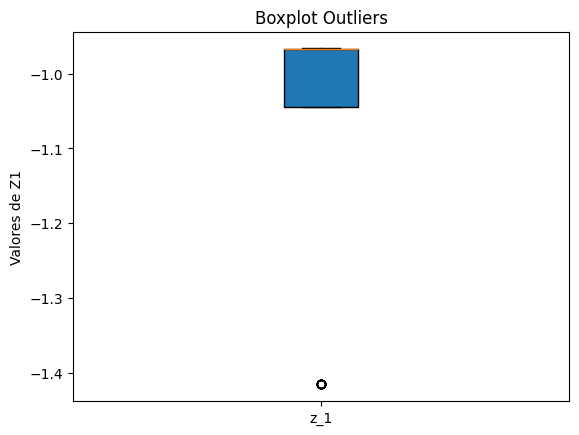

Negocios Fiduciarios
Cuenta: Negocios Fiduciarios, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


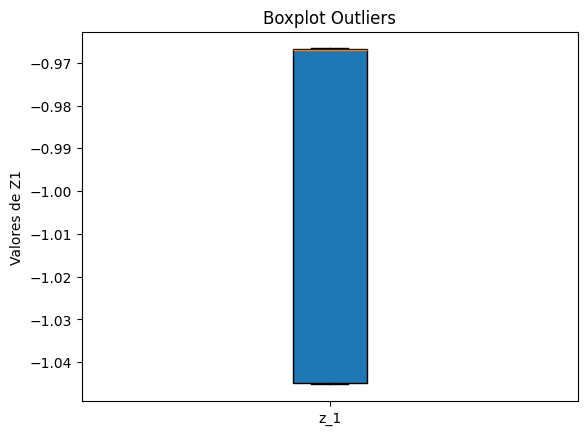

 Publicidad
Cuenta:  Publicidad, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


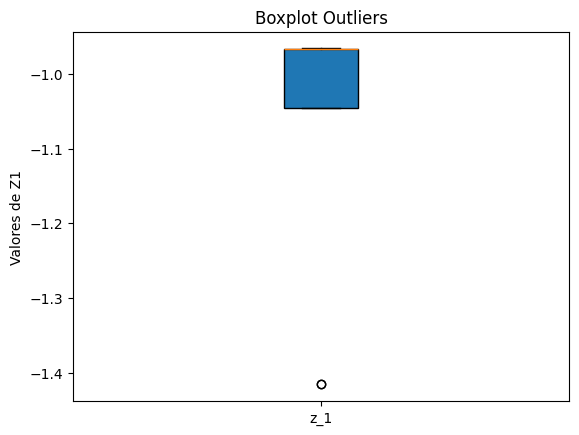

 Cesantias E Intereses A Las Cesantías
Cuenta:  Cesantias E Intereses A Las Cesantías, Número de outliers: 13


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


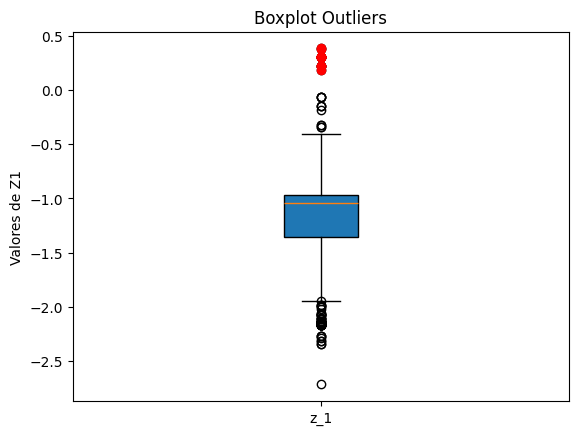

 Asesoría Jurídica
Cuenta:  Asesoría Jurídica, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


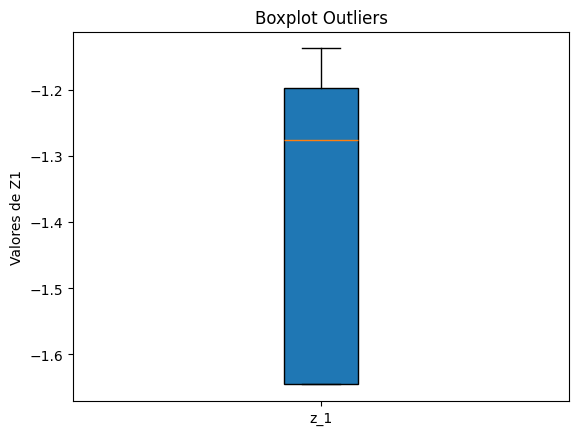

Honorarios Otros
Cuenta: Honorarios Otros, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


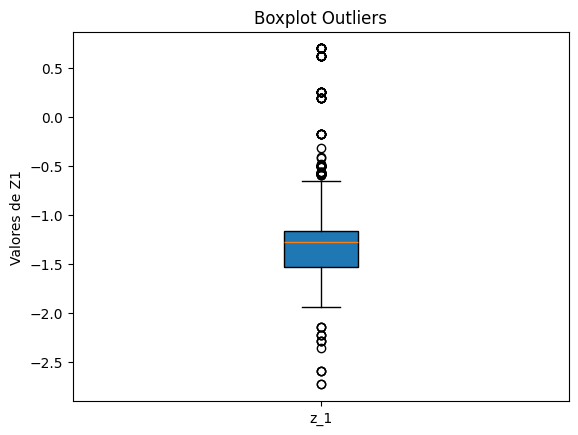

Honorarios Riesgo Operativo
Cuenta: Honorarios Riesgo Operativo, Número de outliers: 1


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


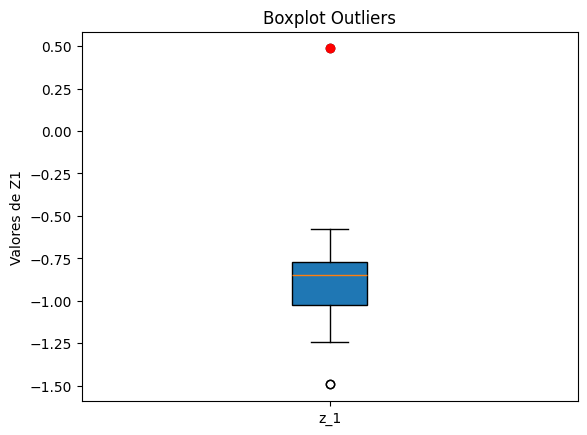

 Servicios Publicos
Cuenta:  Servicios Publicos, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


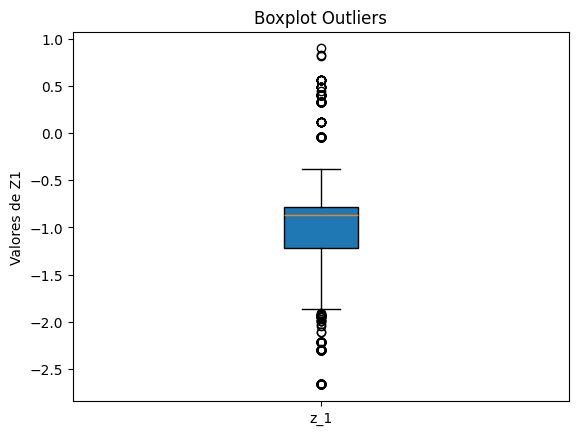

 Contribuciones Y Afiliaciones
Cuenta:  Contribuciones Y Afiliaciones, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


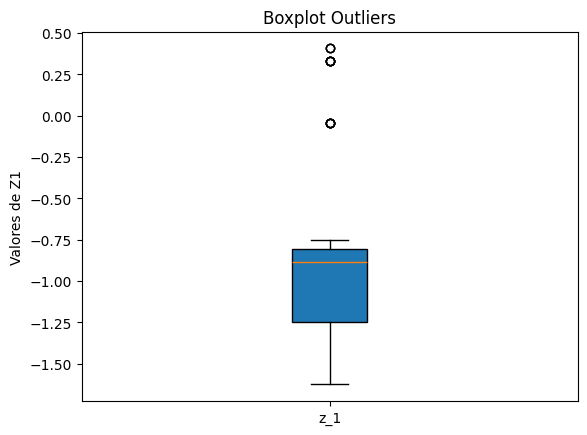

 Garantías
Cuenta:  Garantías, Número de outliers: 2


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


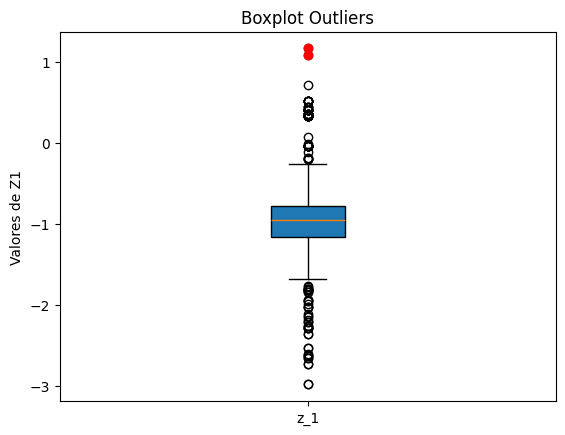

Honorarios Avaluos
Cuenta: Honorarios Avaluos, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


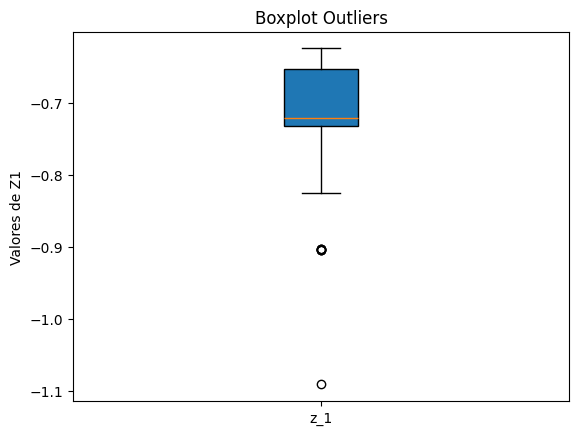

 Honorarios Junta Directiva
Cuenta:  Honorarios Junta Directiva, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


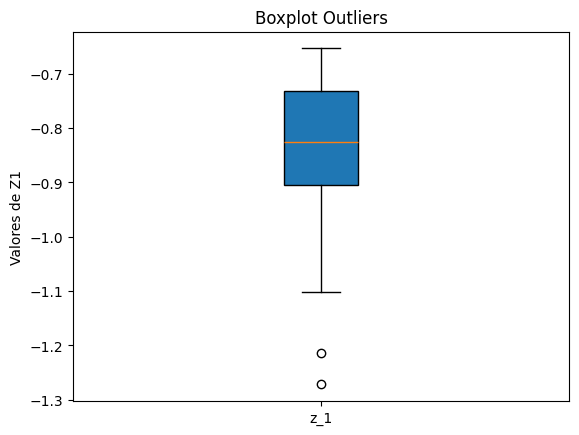

Depreciación Y Amortización
Cuenta: Depreciación Y Amortización, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


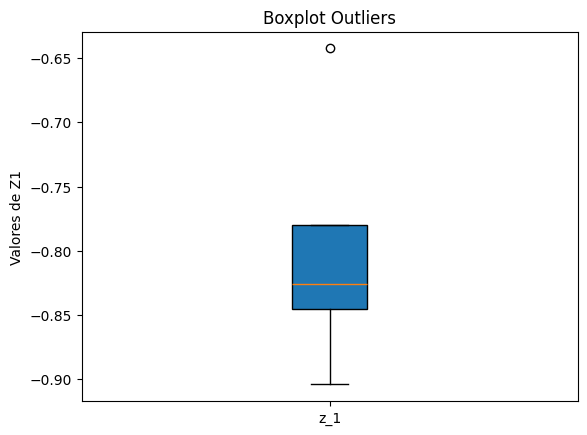

 Actividades Fiduciarias
Cuenta:  Actividades Fiduciarias, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


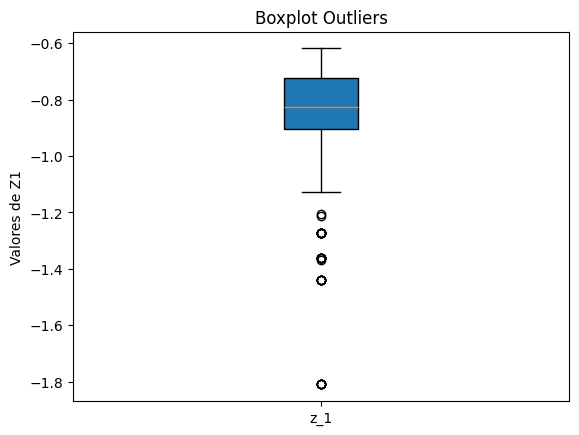

 Gastos De Viaje
Cuenta:  Gastos De Viaje, Número de outliers: 0


C:\Users\mhc_1\AppData\Local\Temp\ipykernel_10848\277726063.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)


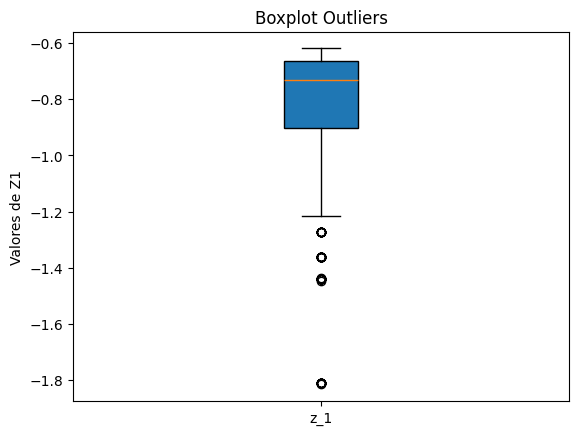

Cantidad de Outlies Detectados Usando PCA: 381


In [18]:
# Lista que almacena las características únicas de la variable 'nivel_1_cuenta'
cuentas = df_pca_result['nivel_1_cuenta'].unique()
sum_num_outliers = 0
# DataFrame que almacena Outliers
PCA_outliers = pd.DataFrame()
# Se itera en cada cuenta para detectar outliers definiendo un límite superir calculado con el rango intercuartil
for cuenta in cuentas: 
    print(cuenta)
    df_dist = df_pca_result[df_pca_result['nivel_1_cuenta'] == cuenta]
    # Calcular percentiles 2.5% y 97.5%
    Q1 = df_dist['z_1'].quantile(0.025)
    Q3 = df_dist['z_1'].quantile(0.975)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers solo limite superior
    df_dist['is_outlier'] = df_dist['z_1'].apply(lambda x: True if x > upper_bound else False)

    # Calcular y mostrar la suma de outliers
    num_outliers = df_dist['is_outlier'].sum()
    print(f"Cuenta: {cuenta}, Número de outliers: {num_outliers}")
    sum_num_outliers += num_outliers

    # Almacenar Outliers
    PCA_outliers = pd.concat([PCA_outliers, df_dist], ignore_index=True)
    
    # Boxplot por cuenta con sus respectivos outliers
    fig, ax = plt.subplots()

    box = ax.boxplot(df_dist['z_1'], patch_artist=True)

    outliers = df_dist[df_dist['is_outlier']]['z_1']

    for outlier in outliers:
        ax.plot(1,outlier,'ro')

    ax.set_title('Boxplot Outliers')
    ax.set_xticklabels(['z_1'])
    ax.set_ylabel('Valores de Z1')

    plt.show()

print(f'Cantidad de Outlies Detectados Usando PCA: {sum_num_outliers}')


In [19]:
# Generar información de los Outliers identificados 
outliers_pca = PCA_outliers[PCA_outliers['is_outlier'] == True]
#outliers_pca.to_excel('Outliers_PCA_Dummies.xlsx')
outliers_pca


,PC1,PC2,gasto_ejecutado,gasto_ejecutado_scaled,y_gorro,z_1,nivel_1_cuenta,is_outlier
3033,-0.351172,-0.857873,3.911180e+04,0.140705,0.140758,-0.210467,Utiles Y Papeleria,True
3037,-0.351172,-0.857873,1.414000e+04,0.140704,0.140758,-0.210467,Utiles Y Papeleria,True
3038,0.019161,-0.954552,1.756593e+05,0.140704,0.140754,0.159865,Utiles Y Papeleria,True
3039,0.019161,-0.954552,6.025796e+04,0.140704,0.140754,0.159865,Utiles Y Papeleria,True
3040,-0.351172,-0.857873,7.126084e+04,0.140704,0.140758,-0.210467,Utiles Y Papeleria,True
...,...,...,...,...,...,...,...,...
549240,0.161521,-0.950542,8.017526e+06,0.140667,0.140752,0.302187,Cesantias E Intereses A Las Cesantías,True
549299,0.242582,-0.832487,6.225031e+05,0.141332,0.140752,0.383914,Cesantias E Intereses A Las Cesantías,True
556314,0.345416,-0.799191,1.750000e+08,0.140704,0.140751,0.486121,Honorarios Riesgo Operativo,True
562897,0.931151,-0.904595,-3.088000e+03,0.158156,0.140745,1.089307,Garantías,True
